<a href="https://colab.research.google.com/github/satyambhatt5/Satyam/blob/main/Mall_Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# K-Means Clustering
# K means clustering only works with Numeric Variables
#import the library for math calculation

import pandas as pd 
import numpy as np
from pandas import plotting
import missingno as msno


#import the library for k means clustering 

from sklearn.cluster import KMeans


# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff


In [ ]:
# i have data set for the  shopping model 
#I have loaded the dataset and cleaned the columns in the first part of this project
#then I have created some visuals and some new columns to analyze the data
#then have performed KMeans Clustering (Unsupervised) Machine Learning Model.
#I have also used the Elbow Method after KMeans Clustering to see if the clusters I chse could be any better.

In [ ]:
mall=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Artificial intelligence course /Data science /Data Science with R Ankur/Linear + Logistics + DT + RF + KMEANS/Mall_Customers.csv')

In [ ]:
##I have loaded the dataset and cleaned the columns in the first part of this project

mall.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


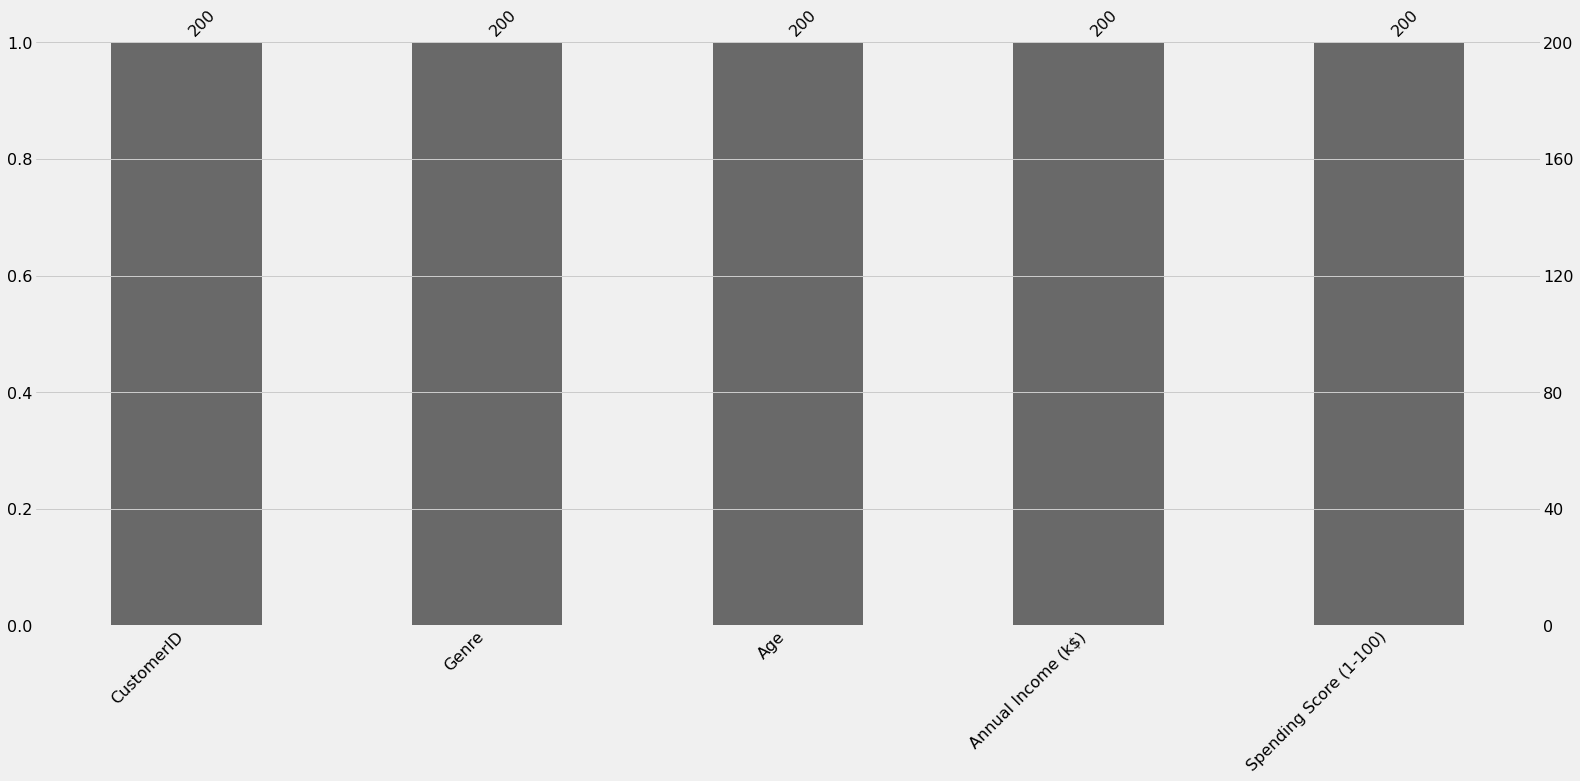

In [ ]:
msno.bar(mall)




1.   We observed that CustomerID is missing.

2.   We will first check approximately how many rows are mssing this detail
Then we will delete the missing rows.

  3.The type of analysis I will be performing requires groupby according to customers so that is why it is necessary to remove null values from this column.




In [ ]:
mall.count()

#mall.isnull().any().any()


CustomerID                200
Genre                     200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [ ]:
#df[df['CustomerID'].isnull()].count()
#100 - ((541909-135000)/541909 * 100) just example to how to calculate 
#Approximately % of the data is missing.
#We will prooceed with dropping the missing rows now.





In [ ]:
mall.dropna(inplace=True)

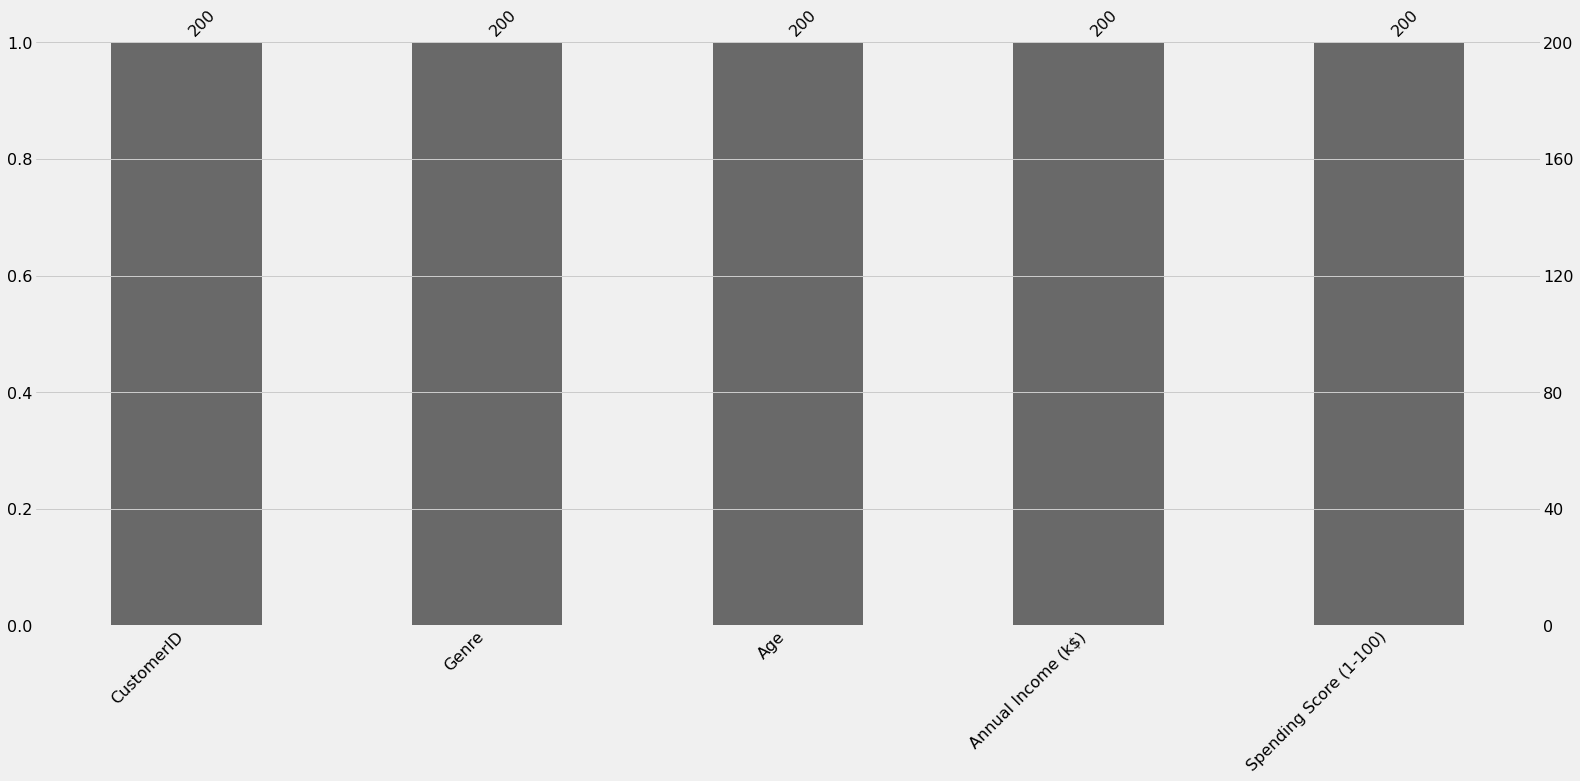

In [ ]:
msno.bar(mall)




> Now we can see above that the matrix is showing all bars are equal
meaning that the data is clean and ready to be used in the model
meanwhile we will change the data type of InvoiceDate to Datetime.
We will also create three new fields:



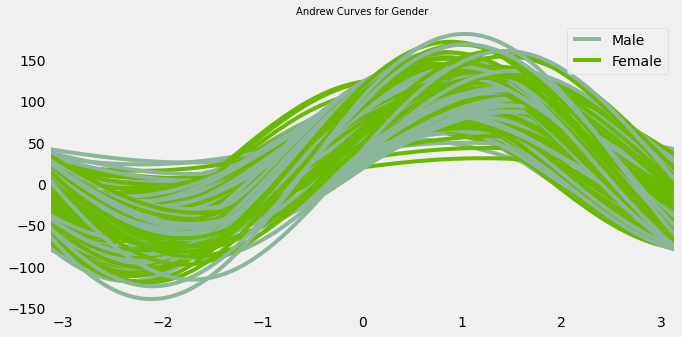

In [ ]:

#data  visualization 

plt.rcParams['figure.figsize'] = (10, 5)

plotting.andrews_curves(mall.drop("CustomerID", axis=1),"Genre")
plt.title('Andrew Curves for Gender', fontsize = 10)
plt.show()

It has been shown the Andrews curves are able to preserve means, distance (up to a constant) and variances. Which means that Andrews curves that are represented by functions close together suggest that the corresponding data points will also be close together

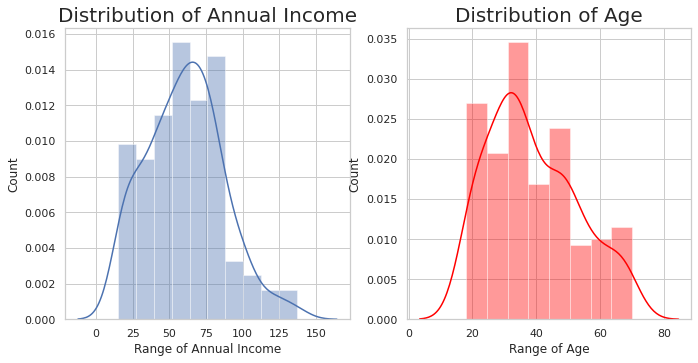

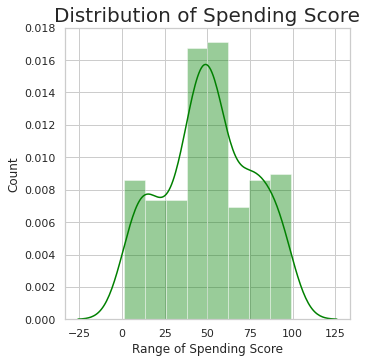

In [ ]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (10, 5)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(mall['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(mall['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(mall['Spending Score (1-100)'], color = 'green')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')
plt.show()

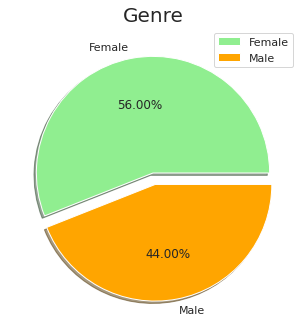

In [ ]:
 labels = ['Female', 'Male']
size = mall['Genre'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

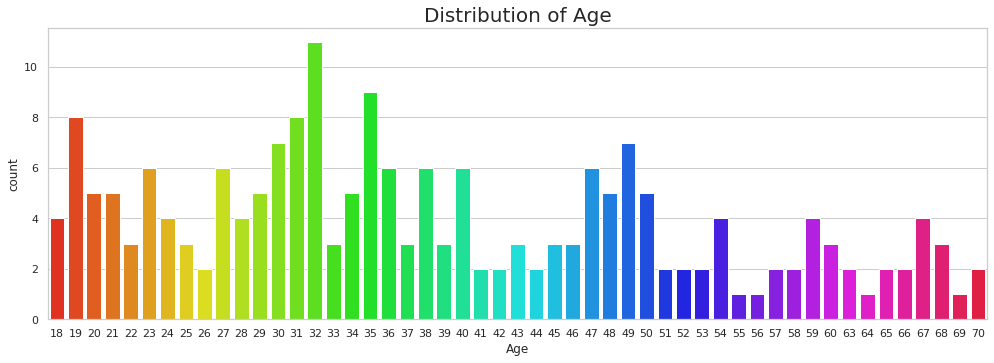

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(mall['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

This Graph shows a more Interactive Chart about the distribution of each Age Group in the Mall for more clariy about the Visitor's Age Group in the Mall.

By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison. Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67. People of Age 55, 56, 69, 64 are very less frequent in the Malls. People at Age 32 are the Most Frequent Visitors in the Mall.

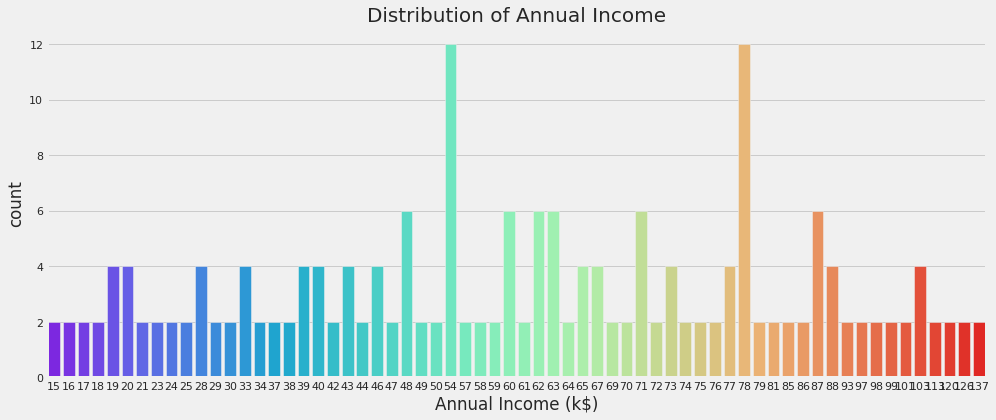

In [ ]:
plt.rcParams['figure.figsize'] = (15, 6)
sns.countplot(mall['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

Again, This is also a chart to better explain the Distribution of Each Income level, Interesting there are customers in the mall with a very much comparable freqyuency with their Annual Income ranging from 15 US Dollars to 137K US Dollars. There are more Customers in the Mall whoc have their Annual Income as 54k US Dollars or 78 US Dollars.

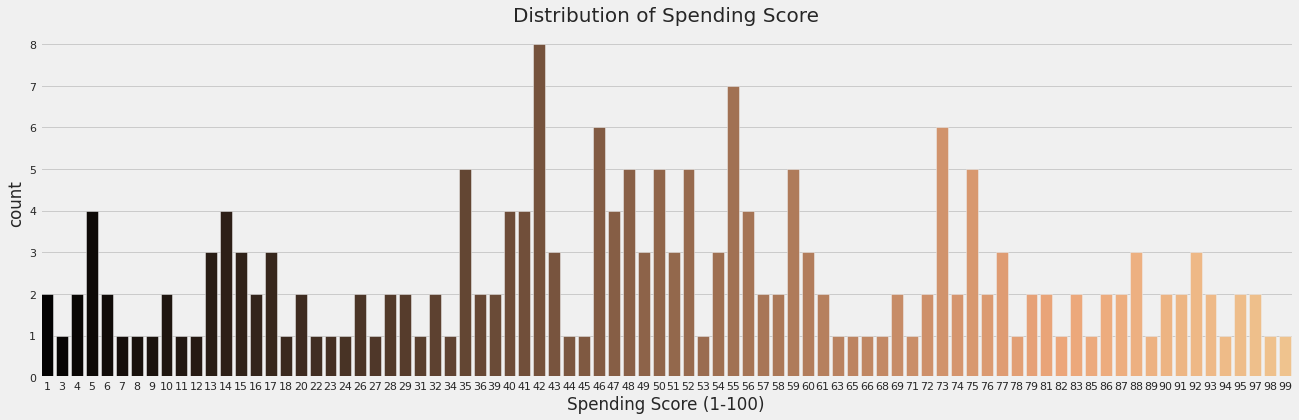

In [ ]:
plt.rcParams['figure.figsize'] = (20, 6)
sns.countplot(mall['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

This is the Most Important Chart in the perspective of Mall, as It is very Important to have some intuition and idea about the Spending Score of the Customers Visiting the Mall.

On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60. Interesting there are customers having I spending score also, and 99 Spending score also, Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

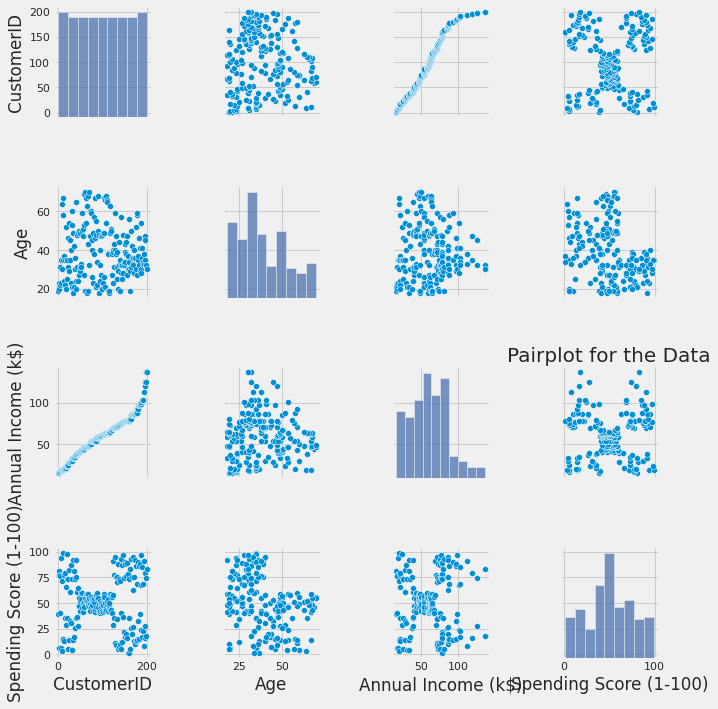

In [ ]:
sns.pairplot(mall)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

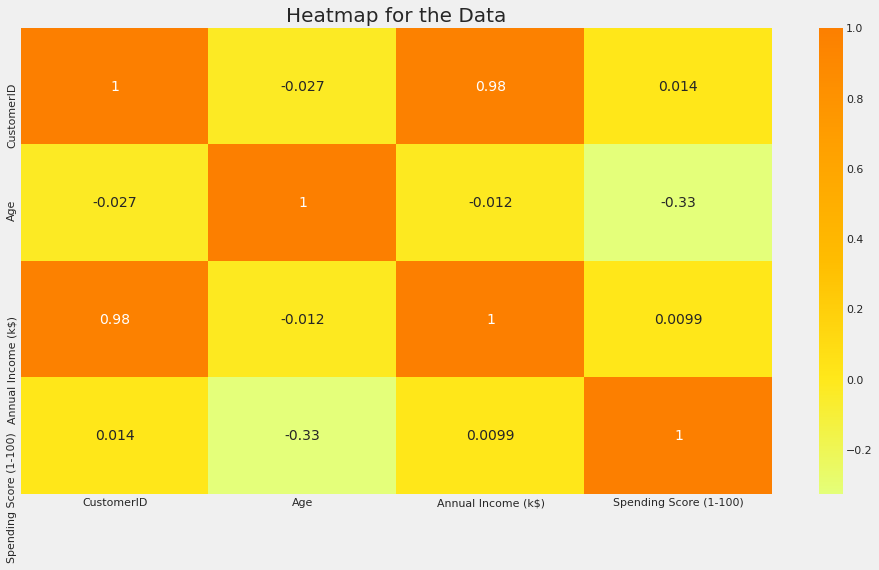

In [ ]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(mall.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The Above Graph for Showing the correlation between the different attributes of the Mall Customer Segementation Dataset, This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color.

We can clearly see that these attributes do not have good correlation among them, that's why we will proceed with all of the features.

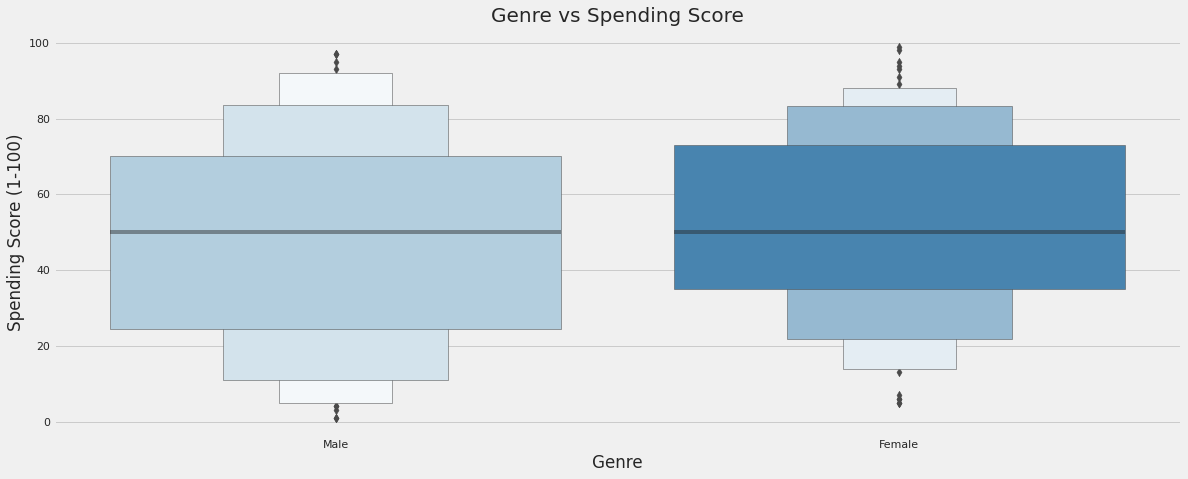

In [ ]:
#  Gender vs Spendscore

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(mall['Genre'], mall['Spending Score (1-100)'], palette = 'Blues')
plt.title('Genre vs Spending Score', fontsize = 20)
plt.show()

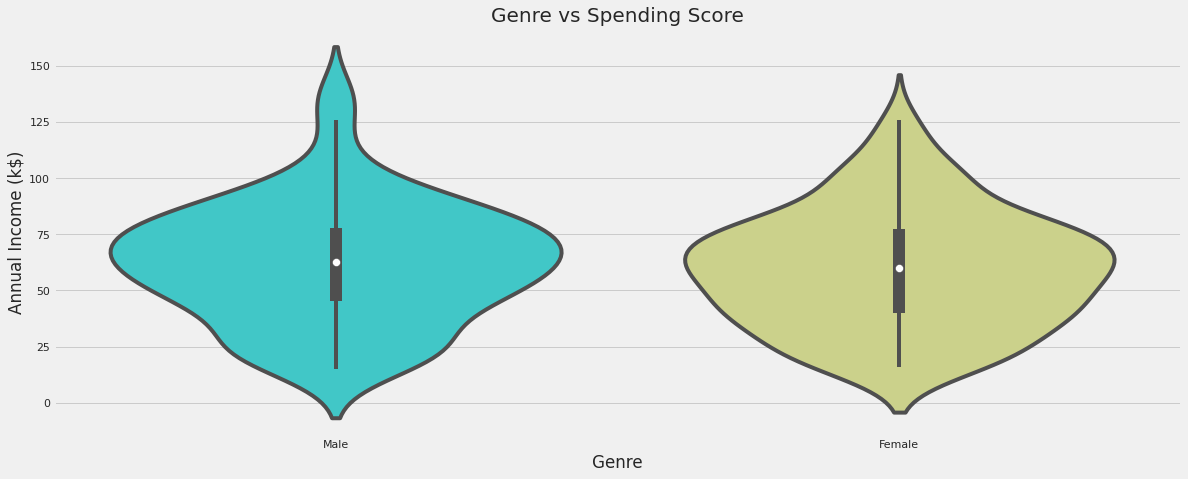

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(mall['Genre'], mall['Annual Income (k$)'], palette = 'rainbow')
plt.title('Genre vs Spending Score', fontsize = 20)
plt.show()

Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

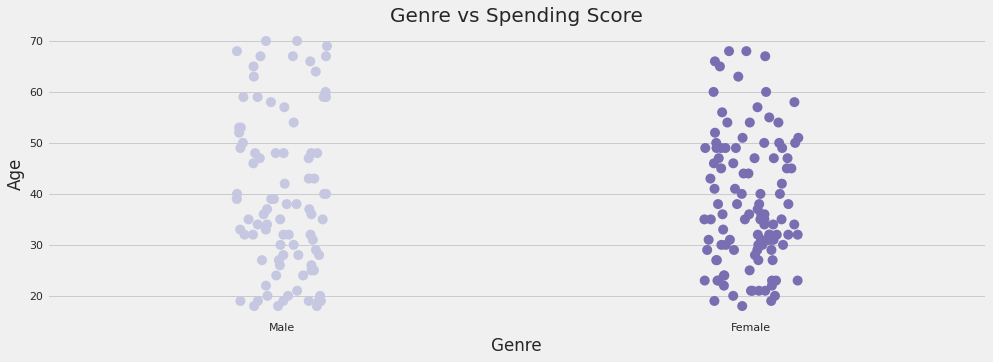

In [ ]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.stripplot(mall['Genre'], mall['Age'], palette = 'Purples', size = 10)
plt.title('Genre vs Spending Score', fontsize = 20)
plt.show()

In [ ]:
x = mall.iloc[:, [3, 4]].values

# let's check the shape of x
print(x.shape)

(200, 2)


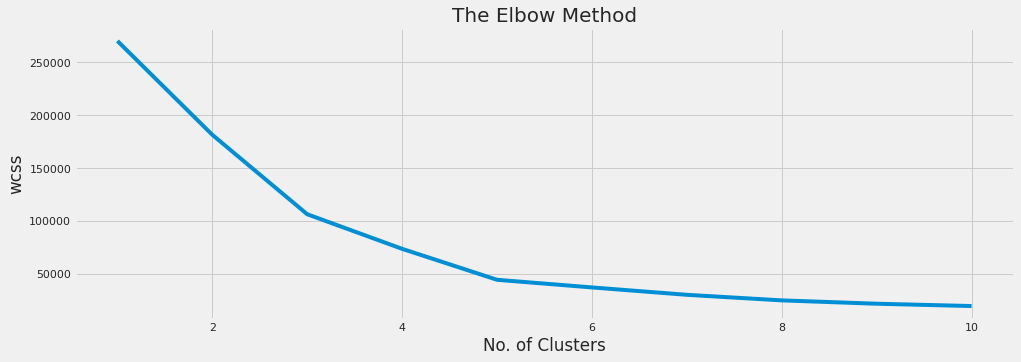

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

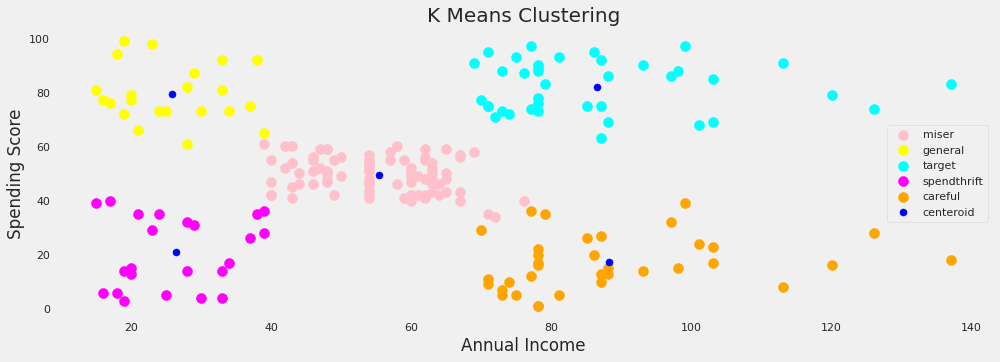

In [ ]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()